# Q1 Make Trackbar for the following images to tune the parameters of canny detection.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img1 = plt.imread('solidWhiteCurve.jpg')
img2 = plt.imread('solidYellowCurve2.jpg')

In [4]:
def findEdges(img,threshold1,threshold2):
    blur = cv2.GaussianBlur(img, (5,5), 0)
    return cv2.Canny(blur, threshold1, threshold2)

In [4]:
#callback 
def nothing(x):
    pass

cv2.namedWindow('Window')

cv2.createTrackbar('Image', 'Window', 0, 1, nothing)
cv2.createTrackbar('Threshold1', 'Window', 0, 250, nothing)
cv2.createTrackbar('Threshold2', 'Window', 0, 250, nothing)

while 1:
    num = cv2.getTrackbarPos('Image', 'Window')
    th1 = cv2.getTrackbarPos('Threshold1', 'Window')
    th2 = cv2.getTrackbarPos('Threshold2', 'Window')
    if num == 0:
        img = img1
    elif num == 1:
        img = img2
    #img[:] = value
    cv2.imshow('Window', findEdges(img, th1,th2))
    
    k = cv2.waitKey(1)
    if k == ord('s'):
        edges1 = findEdges(img, th1, th2)
    if k == ord('m'):
        edges2 = findEdges(img, th1, th2)
    if k == ord('q'):
        break
cv2.destroyAllWindows()

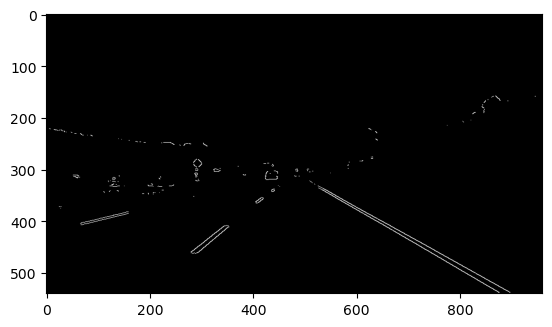

In [19]:
plt.imshow(edges1, cmap='gray')

## observation: When thresholds are zeros, it gets nearly every edge in the image, even if it is not visible enough. When thresholds gets larger(200->250), it return the big and more visible edges only

# Q2 The out of question 1 make it as input for question 2 after make region of interest then make trackbar for houghlines parameters (threshold ,min_line_length, max_line_gap) and then draw 2 line on image.

## 1- Region of interest

In [5]:
def roi(img):
    mask = np.zeros_like(img)
    vert = np.array(
    [
        [
        (img.shape[1]/12, img.shape[0]),
        (img.shape[1]*5/12, img.shape[0]*3/5),
        (img.shape[1]*7/12, img.shape[0]*3/5),
        (img.shape[1], img.shape[0])
        ]
    ], dtype=np.int32
    )
    cv2.fillPoly(mask, vert, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [6]:
masked1 = roi(edges1)
masked2 = roi(edges2)

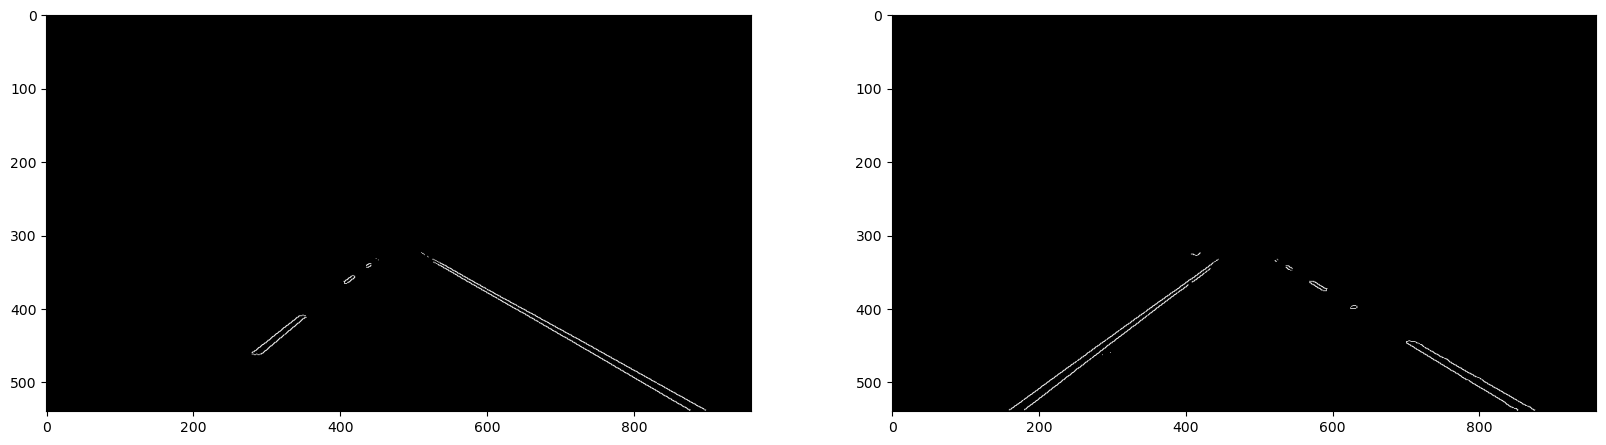

In [20]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(masked1, cmap='gray')
ax1.imshow(masked2, cmap='gray')

## Trackbar to control houghlines

In [6]:
def formulate_lanes(lines, img):
    negativeSlopes = []
    positiveSlopes = []

    negativeInter = []
    positiveInter = []

    y_min = img.shape[0]
    y_max = img.shape[0]

    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2-y1) / (x2-x1)
            intercept = y2-(slope*x2)

            y_min = min(y1, y2, y_min)

            if slope > 0.0:
                positiveSlopes.append(slope)
                positiveInter.append(intercept)
            elif slope < 0.0:
                negativeSlopes.append(slope)
                negativeInter.append(intercept)

    postitiveSlope = np.mean(positiveSlopes)
    positiveIntercept = np.mean(positiveInter)

    negativeSlope = np.mean(negativeSlopes)
    negativeIntercept = np.mean(negativeInter)
    
    pts = [
        [[0,0,0,0]],
        [[0,0,0,0]]
    ]
    # Positive
    if len(positiveSlopes) > 0:
        x_max = (y_max - positiveIntercept) / postitiveSlope
        x_min = (y_min - positiveIntercept) / postitiveSlope
        pts[0][0] = [x_min, y_min, x_max, y_max]
    # Negative
    if len(negativeSlopes) > 0:
        x_max = (y_max - negativeIntercept) / negativeSlope
        x_min = (y_min - negativeIntercept) / negativeSlope
        pts[1][0] = [x_min, y_min, x_max, y_max]
        
    return np.array(pts, dtype=np.int32)

In [7]:
def toGray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
def houghLines(img, threshold, minLength, maxGap):
    #  cv2.HoughLinesP(img, resolution of rho, resolution of theta, threshold, MinLineLength ,MaxLineGap )
    return cv2.HoughLinesP(img, 3.5, np.pi/180, threshold, minLength, maxGap)

In [9]:
def drawLines(img, lines):
    lines_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lines_img, (x1, y1), (x2,y2), [255, 0, 0], 5)
    return lines_img

In [15]:
def drawLinesImg(img, lines):
    for line in lines:
        for x1,y1,x2,y2 in line:
            res = cv2.line(img, (x1,y1), (x2,y2), [0,0,255], 10)
    return res

In [11]:
#callback 
def nothing(x):
    pass

cv2.namedWindow('Window')

cv2.createTrackbar('Image', 'Window', 0, 1, nothing)
cv2.createTrackbar('Threshold', 'Window', 0, 250, nothing)
cv2.createTrackbar('MinLineLength', 'Window', 0, 250, nothing)
cv2.createTrackbar('MaxLineGap', 'Window', 0, 250, nothing)


while 1:
    num = cv2.getTrackbarPos('Image', 'Window')
    threshold = cv2.getTrackbarPos('Threshold', 'Window')
    minLength = cv2.getTrackbarPos('MinLineLength', 'Window')
    maxGap = cv2.getTrackbarPos('MaxLineGap', 'Window')
    
    if num == 0:
        img = masked1
    elif num == 1:
        img = masked2
  
    lines = houghLines(img, threshold, minLength, maxGap)
    
    
    cv2.imshow('Window', drawLines(img, lines))

    k = cv2.waitKey(1)
    if k == ord('s'):
        lines1 = lines
    if k == ord('m'):
        lines2 = lines
    if k == ord('q'):
        break
cv2.destroyAllWindows()

In [13]:
lanes1 = formulate_lanes(lines1, img1)
lanes2 = formulate_lanes(lines2, img2)

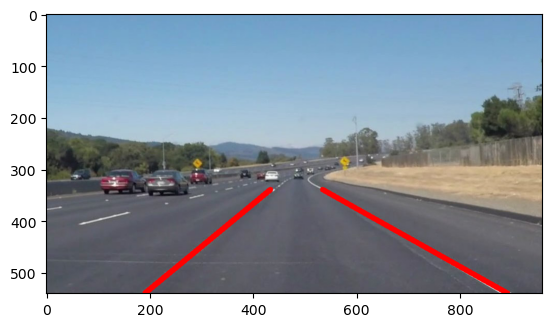

In [16]:
plt.imshow(drawLinesImg(img1, lanes1))

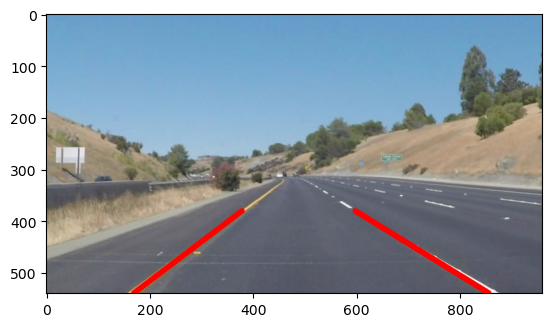

In [15]:
plt.imshow(drawLinesImg(img2, lanes2))

# Observation
## increasing threshold and maxLineGap plays vital role in determining the lines. 
## less lines detected -> more accurate into transferring them into one lane

# Q3 read the following video and apply lane line detection on it then show output using opencv.

In [16]:
def laneLineDetection(img):
    gray = toGray(img)
    edges = findEdges(gray, 50, 150)
    masked = roi(edges)
    lines = houghLines(masked, 10, 5, 10)
    lanes = formulate_lanes(lines, img)
    res = drawLinesImg(img, lanes)
    return res

In [23]:
cap=cv2.VideoCapture('solidWhiteRight.mp4')
if cap.isOpened() == False:
    print('Error')
    
frameSize = (640, 480)

#out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30.0, frameSize)
cv2.namedWindow('Frame')

while 1:
    state,frame=cap.read()
    if state==True:
        #out.write(laneLineDetection(frame))
        cv2.imshow('Frame',laneLineDetection(frame))
      
        k=cv2.waitKey(100)
        if k== ord('q'):
            break
    else:
         break
  
  
cap.release()
#out.release()
cv2.destroyAllWindows()